<h2>AI 머신러닝 기초 02

In [ ]:
#물고기의 길이와 무게 데이터(도미, 빙어 데이터를 합친 것)

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] #2차원 리스트 만들기
fish_target = [1]*35 + [0]*14      #정답 데이터 만들기          

In [ ]:
#k-최근접 이웃 알고리즘 사용하기

from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier()

<h3>슬라이싱

In [ ]:
#n번째 샘플 가져오기=> 변수명[n-1]

print(fish_data[4]) #다섯 번째 샘플을 가져오기 

[29.0, 430.0]


In [ ]:
#컴퓨터 상으로는 0번부터 시작한다.그래서 우리에게 1이 컴퓨터로는 0이다.

print(fish_data[0])

[25.4, 242.0]


In [ ]:
#인덱스로 0번째부터 4번째 출력하기
#:(콜론)을 사용하여 구분한다. 처음부터 값을 가져오는 거면 콜론 앞에 숫자를 안 적어줘도 된다.

print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
#44번부터 끝까지 출력한다. 끝까지 출력하기에 콜론 뒤에 숫자를 안 적어도 된다.

print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
#9번부터 20까지 출력한다.

print(fish_data[9:21])

[[30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0]]


<h2>훈련세트, 테스트세트


  * 훈련세트, 테스트세트로 나누는 이유 : 영역을 구분하고 얼마나 일반화가 되었는 지를 측정하기 위함이다.

In [ ]:
#훈련세트(=훈련데이터)

train_input=fish_data[:35]
train_target=fish_target[:35]

In [ ]:
#테스트세트(=테스트데이터)

test_input=fish_data[35:]
test_target=fish_target[35:]

In [ ]:
print(train_target)
print(test_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#인덱스를 섞어 만든 train_input, train_target을 훈련한다.

kn.fit(train_input, train_target) 

KNeighborsClassifier()

<h2>샘플링 편향



In [ ]:
#평가한다.
#결과가 0.0이 나왔다는 것은 위에서 샘플링 편향이 발생한 것이다.
#테스트 세트에는 14개의 빙어 데이터가 들어있고, 훈련세트에는 도미만 들어있다.
#그러면 훈련세트에는 빙어가 없기에 빙어 없이 모델을 훈련하면 빙어를 올바르게 분류할 수 없다.

kn.score(test_input, test_target)

0.0

<h2>numpy

* 자동으로 데이터를 섞어주어 샘플링 편향을 방지한다.

In [ ]:
#넘파이를 사용하여 데이터를 섞어준다
#섞어준 후 훈련, 테스트 세트로 나눠준다.

import numpy as np

#리스트를 배열로 바꾼다.
input_arr=np.array(fish_data)
target_arr=np.array(fish_target)

In [ ]:
print(input_arr)
print(target_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#0~48까지 나열해준다.각각 인덱스가 부여된다.

index=np.arange(49)
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [ ]:
#데이터를 섞는 데 매번 다른 위치로 나오기에 42로 시드를 정한다.
#shuffle를 사용하여 데이터를 섞는다.

np.random.seed(42)
np.random.shuffle(index) 
print(index) #결과를 보면 위에서 나온 결과가 다르다는 것을 볼 수 있다.(데이터가 잘 섞임)

[ 8 42 28  7 41 32 43  0 36 15 34 17  2 31 44 26 22 18 14  6 19 40 30 21
 11 13 20  1 27 29  4 35 45 16 47 23 37 33 10 12 24 46 38  9 25 48  3  5
 39]


In [ ]:
#훈련세트(입력, 정답), 테스트세트(입력,정답)로 나눈다.

train_input=input_arr[index[:35]]
train_target=target_arr[index[:35]]

test_inpur=input_arr[index[35:]]
test_target=target_arr[index[35:]]

In [ ]:
#훈력, 평가

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.35714285714285715

In [ ]:
kn.predict([[25,150]])

array([0])

<h2>세로로 만들기

In [ ]:
print(fish_data)
fish_data=np.column_stack((fish_length, fish_weight))
fish_data

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [ ]:
#1~35를 1, 나머지 14개를 0으로 준다.

fish_target=np.concatenate((np.ones(35),np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<h2>데이터 나누기

In [ ]:
#train_test_split사용하여 데이터를 나눈다.

from sklearn.model_selection import train_test_split

train_input, test_input, train_target,test_target=train_test_split(fish_data, fish_target,stratify=fish_target, random_state=42)
#위에서 훈련, 테스트 세트로 나누는 것보다 더 간단한 방법이다.

In [ ]:
print(train_target)
print(test_target)

[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


<h2>shape() : 행과 열의 개수 출력하기

In [ ]:
print(train_target.shape)
print(test_target.shape)

print(train_input.shape)
print(test_input.shape)

(36,)
(13,)
(36, 2)
(13, 2)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
kn= KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
kn.predict([[25,150]])  

array([0.])

In [ ]:
#위에서 데이터를 넣고 출력할 때 어떤 데이터를 이웃으로 인식했는 지를 알려준다.

distances,indexes=kn.kneighbors([[25,150]])
print(distances,indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


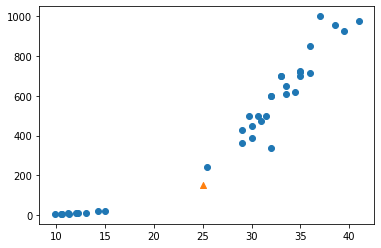

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker='^')
# marker='^'는 산점도에 세모모양으로 나온다.